# Data processing - Level 2

**Not done in this case**
Time averaging:
- 10 sec all instruments, but
- mSEMS remains native)

In [ ]:
%load_ext autoreload
%autoreload 2

## Load level 1.5 dataset

In [2]:
import logging
from helikite.constants import constants

logging.basicConfig(level=constants.LOGLEVEL_CONSOLE)

# define your input and output directories here
input_dir = constants.OUTPUTS_FOLDER / "Processing"
output_level2_dir = constants.OUTPUTS_FOLDER / "Processing" / "Level2"
output_level2_dir.mkdir(parents=True, exist_ok=True)

In [ ]:
from helikite.classes.data_processing_level1_5 import DataProcessorLevel1_5
from helikite.metadata.utils import load_parquet

df_level1_5 = DataProcessorLevel1_5.read_csv(input_dir / "Level1.5" / f"level1.5_{constants.FLIGHT_BASENAME}.csv")

_, metadata = load_parquet(input_dir / "Level0" / f"{constants.LEVEL0_FILE_BASENAME}.parquet")

In [ ]:
from helikite.classes.data_processing_level2 import DataProcessorLevel2
from helikite.classes.output_schemas import OutputSchemas

data_processor = DataProcessorLevel2(getattr(OutputSchemas, constants.OUTPUT_SCHEMA), df_level1_5, metadata)

## Final file
### 10 second resolution
**Averaging over 10 seconds**

In [14]:
data_processor.average(rule="10s")

/tmp/ipykernel_423762/2655038005.py:10: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  df_level2['WindDir'] = df_level1_5['WindDir'].resample('10s').apply(lambda x: circmean(x.dropna(), high=360, low=0))


,Altitude,Lat,Long,P,TEMP,RH,WindSpeed,WindDir,POPS_total_N,mSEMS_total_N,...,tapir_Thead2,tapir_Thead3,tapir_Thead4,tapir_TB,tapir_Tbox,flag_pollution,flag_hovering,flag_cloud,flight_nr,campaign
datetime,,,,,,,,,,,,,,,,,,,,,
2025-02-11 14:33:40,0.66,NaN,NaN,992.59,2.01,82.40,2.20,77.25,58.40,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0,0,58,ORACLES
2025-02-11 14:33:50,1.93,NaN,NaN,992.43,1.97,82.33,2.47,76.20,54.26,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0,0,58,ORACLES
2025-02-11 14:34:00,3.20,NaN,NaN,992.27,1.85,82.30,2.46,75.90,54.54,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,0,58,ORACLES
2025-02-11 14:34:10,3.18,NaN,NaN,992.28,1.93,82.33,2.46,78.20,54.46,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,0,58,ORACLES
2025-02-11 14:34:20,3.35,-70.662,-8.2861,992.25,1.62,83.04,3.08,79.39,56.05,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,0,58,ORACLES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-11 16:59:50,3.02,NaN,NaN,991.84,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,0,58,ORACLES
2025-02-11 17:00:00,2.82,NaN,NaN,991.87,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,0,58,ORACLES
2025-02-11 17:00:10,2.60,NaN,NaN,991.89,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,0,58,ORACLES


### Flight profile
The same flight profile as for Level 1.5, but with the data averaged over 10 seconds.

Example of customizing the flight profile plot:
```python
import dataclasses

custom_variables = data_processor.output_schema.flight_profile_variables.copy()
custom_variables[4] = dataclasses.replace(custom_variables[4], x_divider=20, x_bounds=(0, 120))

data_processor.plot_flight_profiles(constants.FLIGHT_BASENAME, save_path, variables=custom_variables)

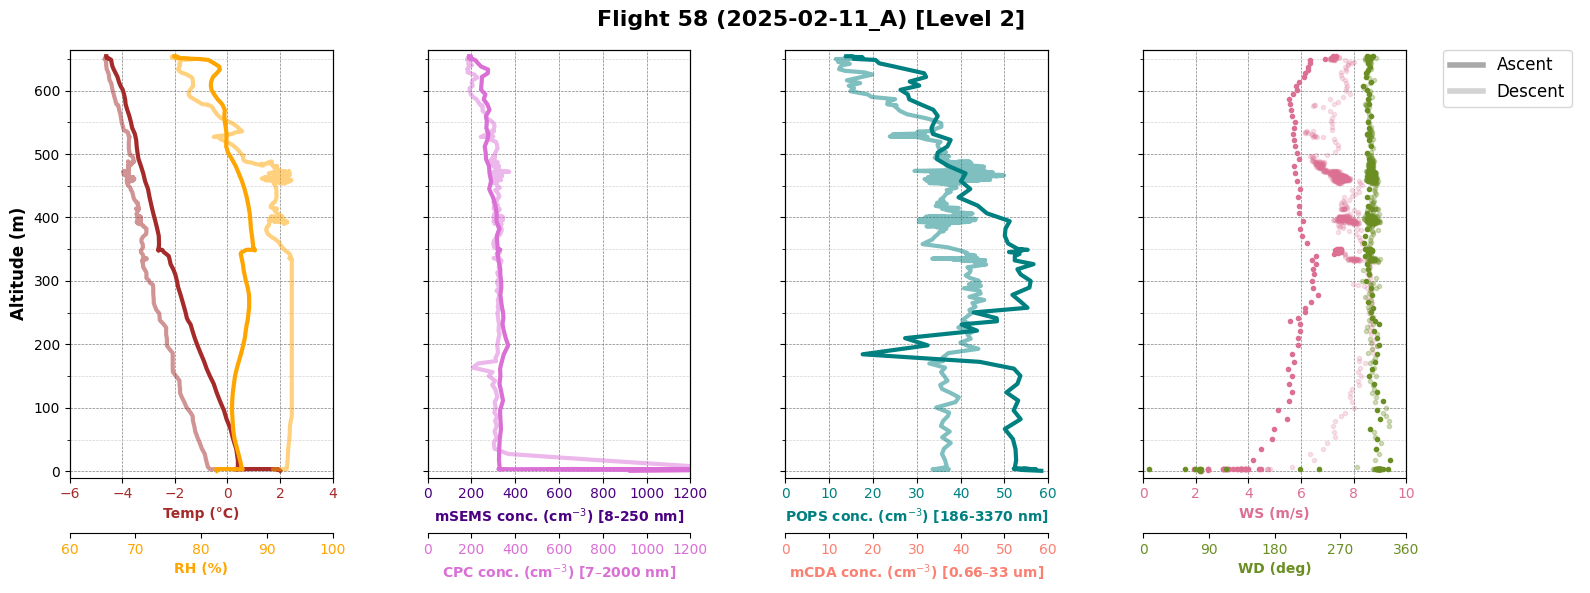

In [15]:
save_path = output_level2_dir / f'Level2_{constants.FLIGHT_BASENAME}_Flight_{constants.FLIGHT}.png'

data_processor.plot_flight_profiles(constants.FLIGHT_BASENAME, save_path, variables=None)

###Size distributions

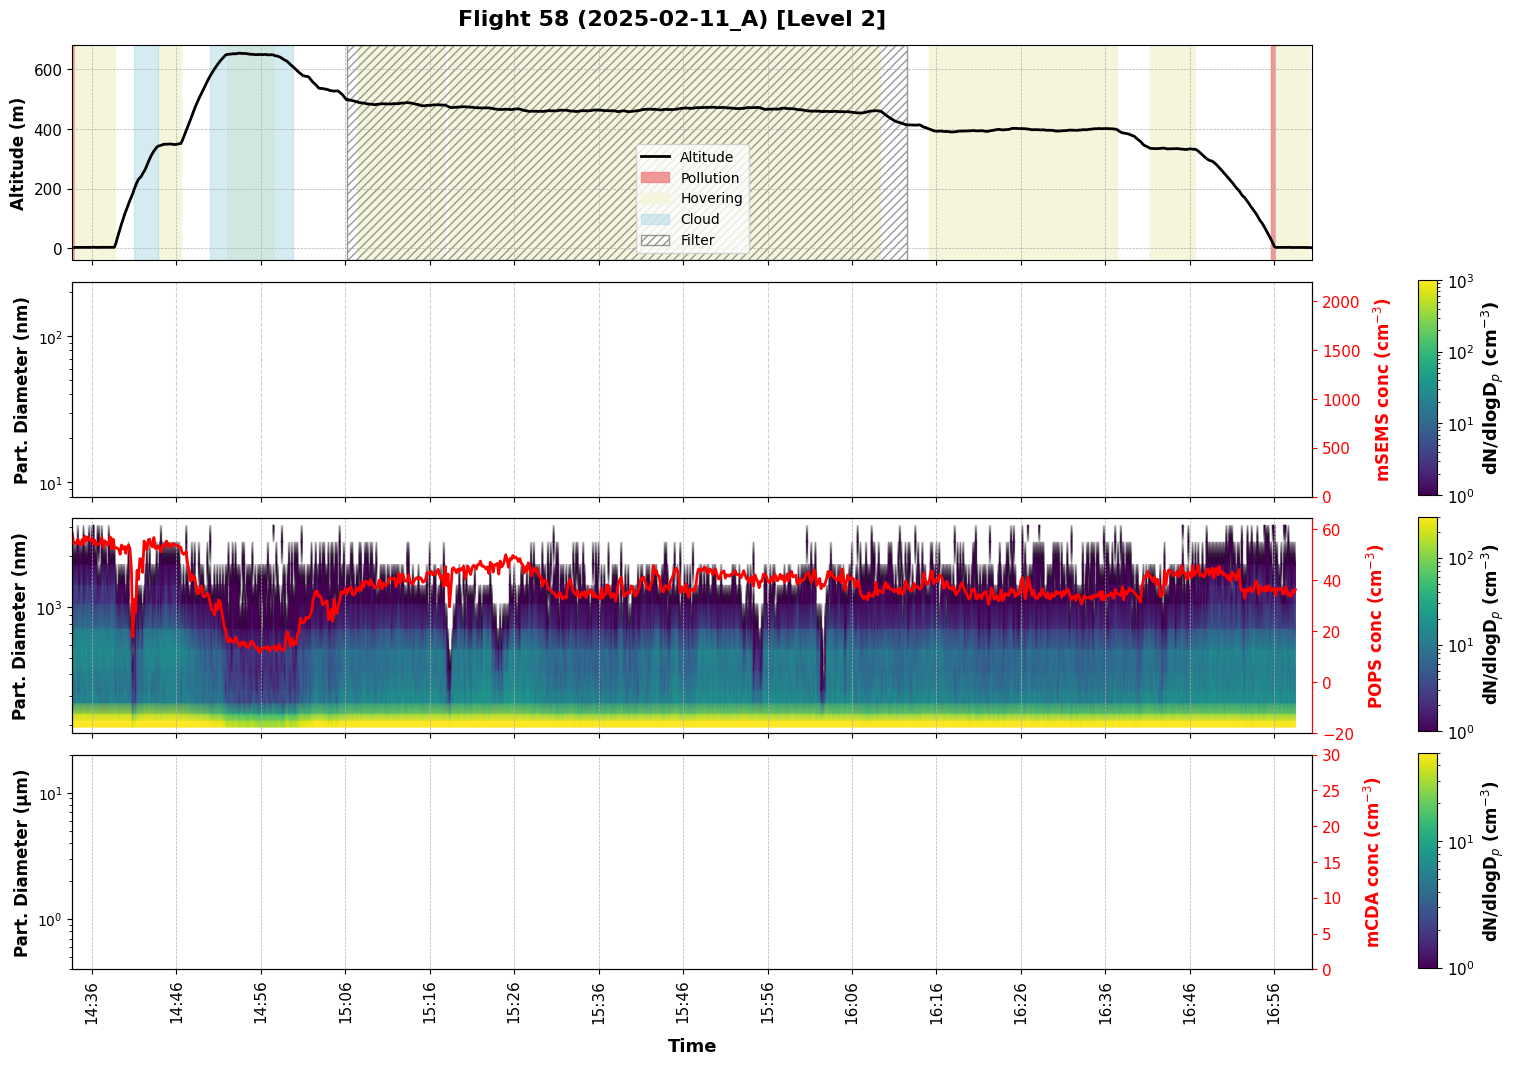

In [16]:
save_path = output_level2_dir / f'Level2_{constants.FLIGHT_BASENAME}_SizeDistr_Flight_{constants.flight}.png'
data_processor.plot_size_distr(constants.FLIGHT_BASENAME, save_path, time_start=None, time_end=None)

In [ ]:
data_processor.export_data(output_level2_dir / f"level2_{constants.FLIGHT_BASENAME}.csv")

**FINISHED**

# Random code bits

### Remove WS and WD outliers after data processing

In [ ]:
import pandas as pd

file_path = output_level2_dir / f"level2_{constants.FLIGHT_BASENAME}.csv"

flight51 = pd.read_csv(file_path)
flight51

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set to True to apply the filter on WS and WD data
apply_wind_filter = False

if apply_wind_filter:
    # Replace WindSpeed > 15 or < 0.1 with NaN
    mask = (flight51['WindSpeed'] > 5) | (flight51['WindSpeed'] < 0.1)
    flight51.loc[mask, 'WindSpeed'] = np.nan

    # Replace corresponding WindDir with NaN
    flight51.loc[mask, 'WindDir'] = np.nan

    # Plot WindSpeed vs Altitude
    plt.figure(figsize=(6,8))
    plt.plot(flight51['WindSpeed'], flight51['Altitude'], color='blue', linewidth=2)

    plt.xlabel("Wind Speed [m/s]", fontsize=12, fontweight='bold')
    plt.ylabel("Altitude [m]", fontsize=12, fontweight='bold')
    plt.title("Wind Speed Profile (NaN > 15 or < 0.1) - Flight 51", fontsize=14, fontweight='bold')
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

In [ ]:
if apply_wind_filter:
    # Save cleaned flight51
    flight51.to_csv(file_path, index=False)

    print(f"Flight 51 saved to {file_path}")